DATA PREPROCESSING


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('spam.tsv',sep='\t')

In [3]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [4]:
df.isna()

,label,message,length,punct
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
5567,False,False,False,False
5568,False,False,False,False
5569,False,False,False,False
5570,False,False,False,False


In [5]:
df.isna().sum()


label      0
message    0
length     0
punct      0
dtype: int64

In [6]:
df.tail()

,label,message,length,punct
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1
5571,ham,Rofl. Its true to its name,26,1


In [7]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [8]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [10]:
df['label'].value_counts()/len(df)

ham     0.865937
spam    0.134063
Name: label, dtype: float64

In [12]:
ham = df[df['label'] =='ham']
spam = df[df['label'] =='spam']

In [13]:
ham.shape, spam.shape

((4825, 4), (747, 4))

In [14]:
ham = ham.sample(spam.shape[0])

In [15]:
ham.shape, spam.shape

((747, 4), (747, 4))

In [18]:
data =ham.append(spam, ignore_index=True)

In [19]:
data.shape


(1494, 4)

In [20]:
data['label'].value_counts()

ham     747
spam    747
Name: label, dtype: int64

In [21]:
data.head()

,label,message,length,punct
0,ham,and picking them up from various points,41,0
1,ham,"Its ok, if anybody asks abt me, u tel them..:-P",47,6
2,ham,Genius what's up. How your brother. Pls send h...,68,4
3,ham,Where @,7,1
4,ham,Please dont say like that. Hi hi hi,35,1


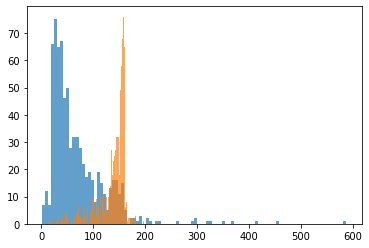

In [25]:
plt.hist(data[data['label']=='ham']['length'],bins=100,alpha=0.7)
plt.hist(data[data['label']=='spam']['length'],bins=100,alpha=0.7)
plt.show()

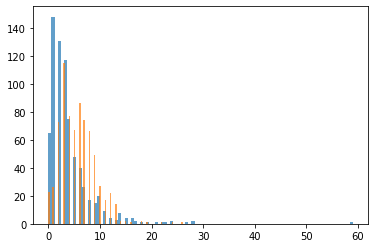

In [26]:
plt.hist(data[data['label']=='ham']['punct'],bins=100,alpha=0.7)
plt.hist(data[data['label']=='spam']['punct'],bins=100,alpha=0.7)
plt.show()

In [27]:
data

,label,message,length,punct
0,ham,and picking them up from various points,41,0
1,ham,"Its ok, if anybody asks abt me, u tel them..:-P",47,6
2,ham,Genius what's up. How your brother. Pls send h...,68,4
3,ham,Where @,7,1
4,ham,Please dont say like that. Hi hi hi,35,1
...,...,...,...,...
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3


In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train,X_test,Y_train,Y_test = train_test_split(data['message'],data['label'],test_size=0.3,random_state=0,shuffle=True)

In [30]:
X_train.shape

(1045,)

In [31]:
X_test.shape

(449,)

BUILDING THE MODEL (RANDOM FOREST)

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline

In [35]:
classifier = Pipeline([("tfidf", TfidfVectorizer()),("classifier",RandomForestClassifier(n_estimators=100))])

In [36]:
classifier.fit(X_train,Y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

PREDICTING THE RESULTS ( RANDOM FOREST ) 

In [40]:
Y_pred = classifier.predict(X_test)

In [41]:
Y_test,Y_pred

(799     spam
 1047    spam
 1436    spam
 54       ham
 793     spam
         ... 
 824     spam
 822     spam
 644      ham
 1034    spam
 1356    spam
 Name: label, Length: 449, dtype: object,
 array(['spam', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'spam', 'ham',
        'ham', 'spam', 'spam', 'ham', 'spam', 'spam', 'spam', 'spam',
        'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'spam',
        'spam', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'spam', 'ham',
        'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'spam', 'spam', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham',
        'ham', 'spam', 'spam', 'ham', 'ham', 'ham', 'spam', 'spam', 'spam',
        'spam', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'spam', 'ham', 'ham', 'ham', 'ham', 'spam', 'spam', 'ham', 'spam',
        'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam

In [43]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [44]:
accuracy_score(Y_test,Y_pred)

0.9510022271714922

In [45]:
confusion_matrix(Y_test, Y_pred)

array([[225,   2],
       [ 20, 202]])

In [47]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

         ham       0.92      0.99      0.95       227
        spam       0.99      0.91      0.95       222

    accuracy                           0.95       449
   macro avg       0.95      0.95      0.95       449
weighted avg       0.95      0.95      0.95       449



BUILDING THE MODEL (SVM)

In [49]:
from sklearn.svm import SVC

In [50]:
svm = Pipeline([("tfidf", TfidfVectorizer()),("classifier",SVC(C=100, gamma='auto'))])

In [51]:
svm.fit(X_train,Y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', SVC(C=100, gamma='auto'))])

PREDICTING THE RESULTS(SVM)

In [52]:
Y_pred = svm.predict(X_test)

In [53]:
accuracy_score(Y_test,Y_pred)

0.955456570155902

In [54]:
confusion_matrix(Y_test,Y_pred)

array([[224,   3],
       [ 17, 205]])

In [55]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

         ham       0.93      0.99      0.96       227
        spam       0.99      0.92      0.95       222

    accuracy                           0.96       449
   macro avg       0.96      0.96      0.96       449
weighted avg       0.96      0.96      0.96       449



In [58]:
test1 = ['Hello, You are learning natural Language Processing']
test2 = ['Hope you are doing good and learning new things']
test3 = ['Congratulations, You won a lottery ticket worth $1 Million ! To claim call on 446677']

In [60]:
print(classifier.predict(test1))
print(classifier.predict(test2))
print(classifier.predict(test3))

['ham']
['ham']
['spam']


In [61]:
print(svm.predict(test1))
print(svm.predict(test2))
print(svm.predict(test3))

['ham']
['ham']
['spam']
